In [1]:
import sys, os
sys.path.append(os.path.dirname(os.getcwd())) # Include ../SSD in path
import tops
from tops.config import instantiate
import matplotlib.pyplot as plt
import pathlib
from ssd.utils import load_config

In [2]:
cfg = load_config("../configs/task21_config.py")
logs = tops.logger.read_logs(pathlib.Path("/work/snotra/adtan/ssd_outputs/task21_config/"))

NOTE! Installing ujson may make loading annotations faster.
It looks like you are currently working on the server, with a 'working directory' in: /work/snotra/adtan
Saving all SSD outputs to: /work/snotra/adtan/ssd_outputs
Found dataset directory in: /work/datasets/tdt4265_2022
Found dataset file in: /work/datasets/tdt4265_2022/train_annotations.json
Found dataset directory in: /work/datasets/tdt4265_2022
Found dataset file in: /work/datasets/tdt4265_2022/val_annotations.json


Text(0.5, 0, 'Global step')

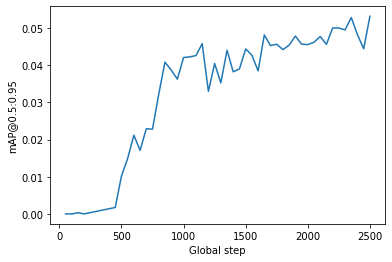

In [3]:
# plot mAP@0.5:0.95

mAP_entries = [entry for entry in logs if "metrics/mAP" in entry]
all_mAPs = [entry["metrics/mAP"] for entry in mAP_entries]
global_steps = [entry["global_step"] for entry in mAP_entries]
plt.plot(global_steps, all_mAPs)
plt.ylabel("mAP@0.5:0.95")
plt.xlabel("Global step")

In [4]:
loss_entries = [entry for entry in logs if "loss/regression_loss" in entry]
global_steps = [entry["global_step"] for entry in loss_entries]

Text(0.5, 0, 'Global step')

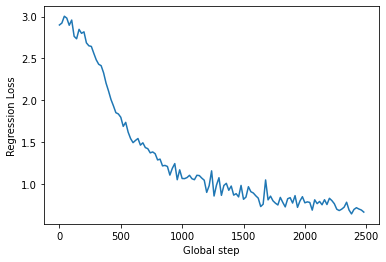

In [5]:
# plot regression loss
regression_losses = [entry["loss/regression_loss"] for entry in loss_entries]
plt.plot(global_steps, regression_losses)
plt.ylabel("Regression Loss")
plt.xlabel("Global step")

Text(0.5, 0, 'Global step')

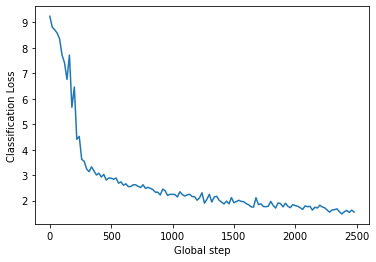

In [6]:
# plot classification loss
classification_losses = [entry["loss/classification_loss"] for entry in loss_entries]
plt.plot(global_steps, classification_losses)
plt.ylabel("Classification Loss")
plt.xlabel("Global step")

Text(0.5, 0, 'Global step')

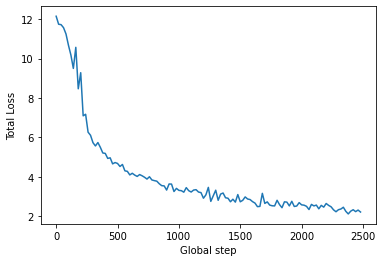

In [7]:
# plot total loss
total_losses = [entry["loss/total_loss"] for entry in loss_entries]
plt.plot(global_steps, total_losses)
plt.ylabel("Total Loss")
plt.xlabel("Global step")

In [8]:
model = instantiate(cfg.model)

num_parameters = sum(p.numel() for p in model.parameters())
num_trainable_parameters = sum(p.numel() for p in model.parameters() if p.requires_grad)

print("Total number of parameters: ", num_parameters)
print("Total number of trainable parameters: ", num_trainable_parameters)

Total number of parameters:  2811680
Total number of trainable parameters:  2549920


In [9]:
%cd ../configs

/home/adtan/project/assignment4/SSD/configs


In [10]:
!python ../runtime_analysis.py task21_config.py

NOTE! Installing ujson may make loading annotations faster.
It looks like you are currently working on the server, with a 'working directory' in: /work/snotra/adtan
Saving all SSD outputs to: /work/snotra/adtan/ssd_outputs
Found dataset directory in: /work/datasets/tdt4265_2022
Found dataset file in: /work/datasets/tdt4265_2022/train_annotations.json
Found dataset directory in: /work/datasets/tdt4265_2022
Found dataset file in: /work/datasets/tdt4265_2022/val_annotations.json
2022-05-07 18:06:23,372 [INFO ] Loaded checkpoint from /work/snotra/adtan/ssd_outputs/task21_config/checkpoints/2500.ckpt
/opt/conda/lib/python3.8/site-packages/torch/utils/data/dataloader.py:478: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid 